# SymPy examples

sources:
http://docs.sympy.org/latest/tutorial/
http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/notebooks/SymPy%20Examples.ipynb

In [1]:
from __future__ import division
import sympy as sym
# make things look pretty in the notebook
from sympy.interactive import printing
printing.init_printing()

import math

### basic symbolic manipulation

In [2]:
print(math.sqrt(2))

1.4142135623730951


In [3]:
print(sym.sqrt(2))

sqrt(2)


In [4]:
print(sym.sqrt(8))

2*sqrt(2)


We can do symbolic math not just on numbers, but we can tell SymPy what to treat as a variable

In [6]:
from sympy import symbols
x, y, z = sym.symbols("x y z")

In [7]:
expr = x + 2*y
expr

In [8]:
expr - 1

In [9]:
expr - y

In [10]:
f = x*expr
f

In [11]:
g = sym.expand(f)
g

In [12]:
sym.factor(g)

### Using SymPy interactively

In [13]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.5.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### substitution

In [14]:
expr = sin(x*2*pi)
expr

In [15]:
expr.subs(x,1)

In [16]:
a = expr.subs(x,0.125)
a

In [17]:
type(a)

sympy.core.mul.Mul

Note that this is not a floating point number -- it is still a SymPy object.  To make it floating point, we can use evalf()

In [18]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


In [19]:
pi.evalf(100)

want regular python types?

In [20]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


### Python and SymPy

sympy symbols are just objects and when you do operations on two sympy objects the result is a sympy object.  When you combine a sympy and python object, the result is also a sympy object.  But now we need to be careful when doing fractions.  For instance doing `x + 1/3` will first compute `1/3` in python (giving `0` or `0.333...` depending on the division operator) and then add it to the sympy `x` symbol.  The `Rational()` function makes this all happen in sympy

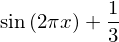

In [21]:
f = expr + Rational(1,3)
f

In [22]:
expr + 1/3

### equality

`=` is still the assignment operator of python (it does not mean symbolic equality), and `==` is still the logical test (exact structural equality).  There is a separate object, `Eq()` to specify symbolic equality

In [23]:
x + 1 == 4

False

In [24]:
Eq(x + 1, 4)

In [25]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [26]:
a == b

False

In [27]:
simplify(a - b)   # this will test equality algebraically

In [28]:
a = cos(x) + I*sin(x)
a

In [29]:
simplify(a)

### More substitution

note that substitution returns a new expression: SymPy objects are immutable

In [30]:
expr = cos(x)
expr.subs(x, 0)

In [31]:
expr

In [32]:
x

multiple substitutions, pass a list of tuples

In [33]:
expr = x**3 + 4*x*y - z
expr

In [34]:
expr.subs([(x, 2), (y, 4), (z, 0)])

### simplifying

There is not unique definition of what the simplest form of an expression is.

`simplify()` tries lots of methods for simplification

In [35]:
simplify(sin(x)**2 + cos(x)**2)

In [36]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

In [37]:
simplify(gamma(x)/gamma(x - 2))

but sometimes it doesn't have your idea of what the simplest form is

In [38]:
simplify(x**2 + 2*x + 1)

instead factor may be what you want

In [39]:
factor(x**2 + 2*x + 1)

### polynomial simplification

In [40]:
expand((x + 1)**2)

In [41]:
expand((x + 2)*(x - 3))

In [42]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

In [43]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [44]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

collect collects common powers

In [45]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [46]:
collected_expr = collect(expr, x)
collected_expr

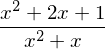

In [47]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

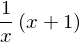

In [48]:
cancel(a)

trigsimp simplifies trigonometric identities

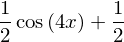

In [49]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [50]:
trigsimp(sin(x)*tan(x)/sec(x))

the tutorial discusses some of the nuances of simplification of powers and special functions

### Calculus

derivatives

In [51]:
diff(cos(x), x)

In [52]:
diff(exp(x**2), x)

third derivative

In [53]:
diff(x**4, x, 3)

differentiate different variables

In [54]:
expr = exp(x*y*z)
diff(expr, x, y, z)

unevaluated derivatied

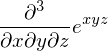

In [55]:
deriv = Derivative(expr, x, y, z)
deriv

In [56]:
deriv.doit()

integrals

In [57]:
integrate(cos(x), x)

definite integral

In [58]:
integrate(exp(-x), (x, 0, oo))

double integral

In [59]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

if it is unable to do the integral, it returns an Integral object

Integral(x**x, x)


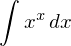

In [60]:
expr = integrate(x**x, x)
print(expr)
expr

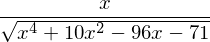

In [61]:
a = x / sqrt(x**4 + 10*x**2 - 96*x - 71)   # example from Wikipedia Risch algorithm page)
a

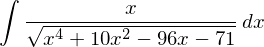

In [62]:
integrate(a, x)     # this has a known solution, but SymPy fails to find it

limits

In [63]:
limit(sin(x)/x, x, 0)

series expansions

In [64]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)    # expansion about x=0 up to 6th order

note: for SymPy 0.7.5 and earlier, the order term O() is only supported for expansions about 0 or oo.  So when you compute the series about a point other than 0 or oo, the result will be shifted to 0.  You need to shift back by first removing the O() term.

In [65]:
print(a)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + 31*x**8/5760 + x**9/5670 + O(x**10)


for SymPy 0.7.6, this is not an issue

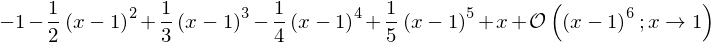

In [66]:
c = log(x).series(x, x0=1, n=6)
c

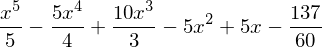

In [67]:
simplify(c.removeO())

### solvers

If no Eq() is done, then it is assumed to be equal to 0

In [68]:
solve(Eq(x**2, 1), x)

In [69]:
solve(x**2 - 1, x)

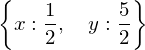

In [70]:
solve([x - y + 2, x + y - 3], [x, y])

roots will report if a solution is multiple by listing it multiple times

In [71]:
roots(x**3 - 6*x**2 + 9*x, x)

0 is 1 root, and 3 is 2 more roots

Differential equations

you need an undefined function (f and g already are by our init_session() above, but we've probably reset these

In [72]:
f, g = symbols('f g', cls=Function)

In [73]:
f(x)

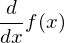

In [74]:
f(x).diff(x)

In [75]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

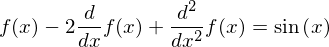

In [76]:
diffeq

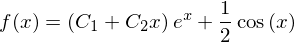

In [77]:
dsolve(diffeq, f(x))

### Matrices

consider the Euler equations:

$$q_t + A(q) q_x = 0$$

where

$$q = \left ( \begin{array}{c} \rho \\ u \\ p \end{array} \right )
\qquad
A(q) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & c^2 \rho & u \end{array} \right ) $$



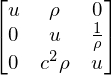

In [78]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')
A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

The eigenvalues of the system are the speeds at which information propagates

In [79]:
A.eigenvals()

We can also find the right and left eigenvectors (it seems we need to take the transpose of A and find it's eigenvectors to get the left eigenvectors).  Note that these are not normalized.

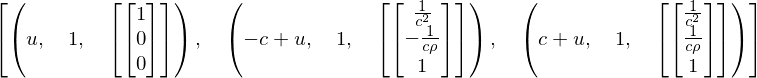

In [80]:
A.eigenvects()

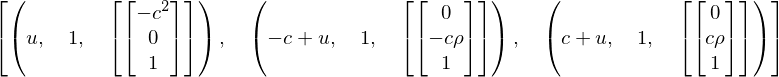

In [81]:
A.T.eigenvects()

### Units

In [82]:
import sympy.physics.units as u

M = 20*u.kilogram
g = 9.81 * u.m / u.s**2
W = M*g
print(W, W/ (1*u.N))

196.2*kg*m/s**2 196.200000000000


there are methods to help you find units

In [83]:
print(u.find_unit('force'))

['force']


In [84]:
print(u.find_unit(u.force))

['N', 'force', 'pound', 'newton', 'pounds', 'newtons']


if you want to do conversions, you divide by the units you want to express the result in, but you need to evaluate it.

In [85]:
mph = u.miles/u.hours
print(mph)
print(mph.n(4))
print((u.c/mph).n(5))
# or
cmph = u.c/mph
cmph.evalf()

1397*m/(3125*s)
0.447*m/s
6.7062e+8


you can define new units (like CGS!)

In [86]:
erg = u.g*u.cm**2/u.s**2

In [87]:
L = 4.e33*erg
(L/u.joule).evalf()

### Vectors